## Problema de Aprendizado Supervisionado: Regressão para Estimar o Valor Médio de um Imóvel

### Objetivo
Desenvolver um modelo de aprendizado supervisionado voltado para regressão, com o intuito de prever o valor médio de imóveis residenciais no estado da Califórnia.

### Conjunto de Dados
Utilizaremos um conjunto de dados públicos fornecido pelo **Departamento de Censo dos Estados Unidos (U.S. Census Bureau)**. Esse dataset contém informações socioeconômicas e geográficas de diferentes regiões da Califórnia, como:

- Renda média por domicílio  
- Idade média das casas  
- Número médio de quartos e dormitórios  
- População e densidade domiciliar  
- Coordenadas geográficas (latitude e longitude)  

### Tarefa
A tarefa consiste em treinar um modelo de regressão para prever a variável alvo: **valor médio dos imóveis por região**, com base nas características acima.



## 1. Obtenção e Preparação dos Dados

In [ ]:
import urllib.request
import os
import tarfile
import urllib



# Define URLs e paths locais para download e extração do dataset de habitação
DOWNLOAD_ROOT = "https://github.com/ageron/handson-ml2/raw/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# Faz download do arquivo .tgz e extrai seu conteúdo para o diretório de trabalho
def fetch_house_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_house_data()


C:\Users\romario.santos\AppData\Local\Temp\ipykernel_40716\1642178675.py:17: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path=housing_path)


In [ ]:
# Carrega o arquivo CSV com os dados de habitação como DataFrame
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

load_housing_data()



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Análise Exploratória de Dados (EDA)


In [ ]:
# Visualizar as 05 linhas do dataset
housing = load_housing_data()
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# Informações sobre os tipos de dados
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing["ocean_proximity"].value_counts() #ocean é uma var. categorica, com esse comando conseguimos ver quais categorias tem e suas quantidades

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
housing.describe() # resumo dos atributos numericos

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


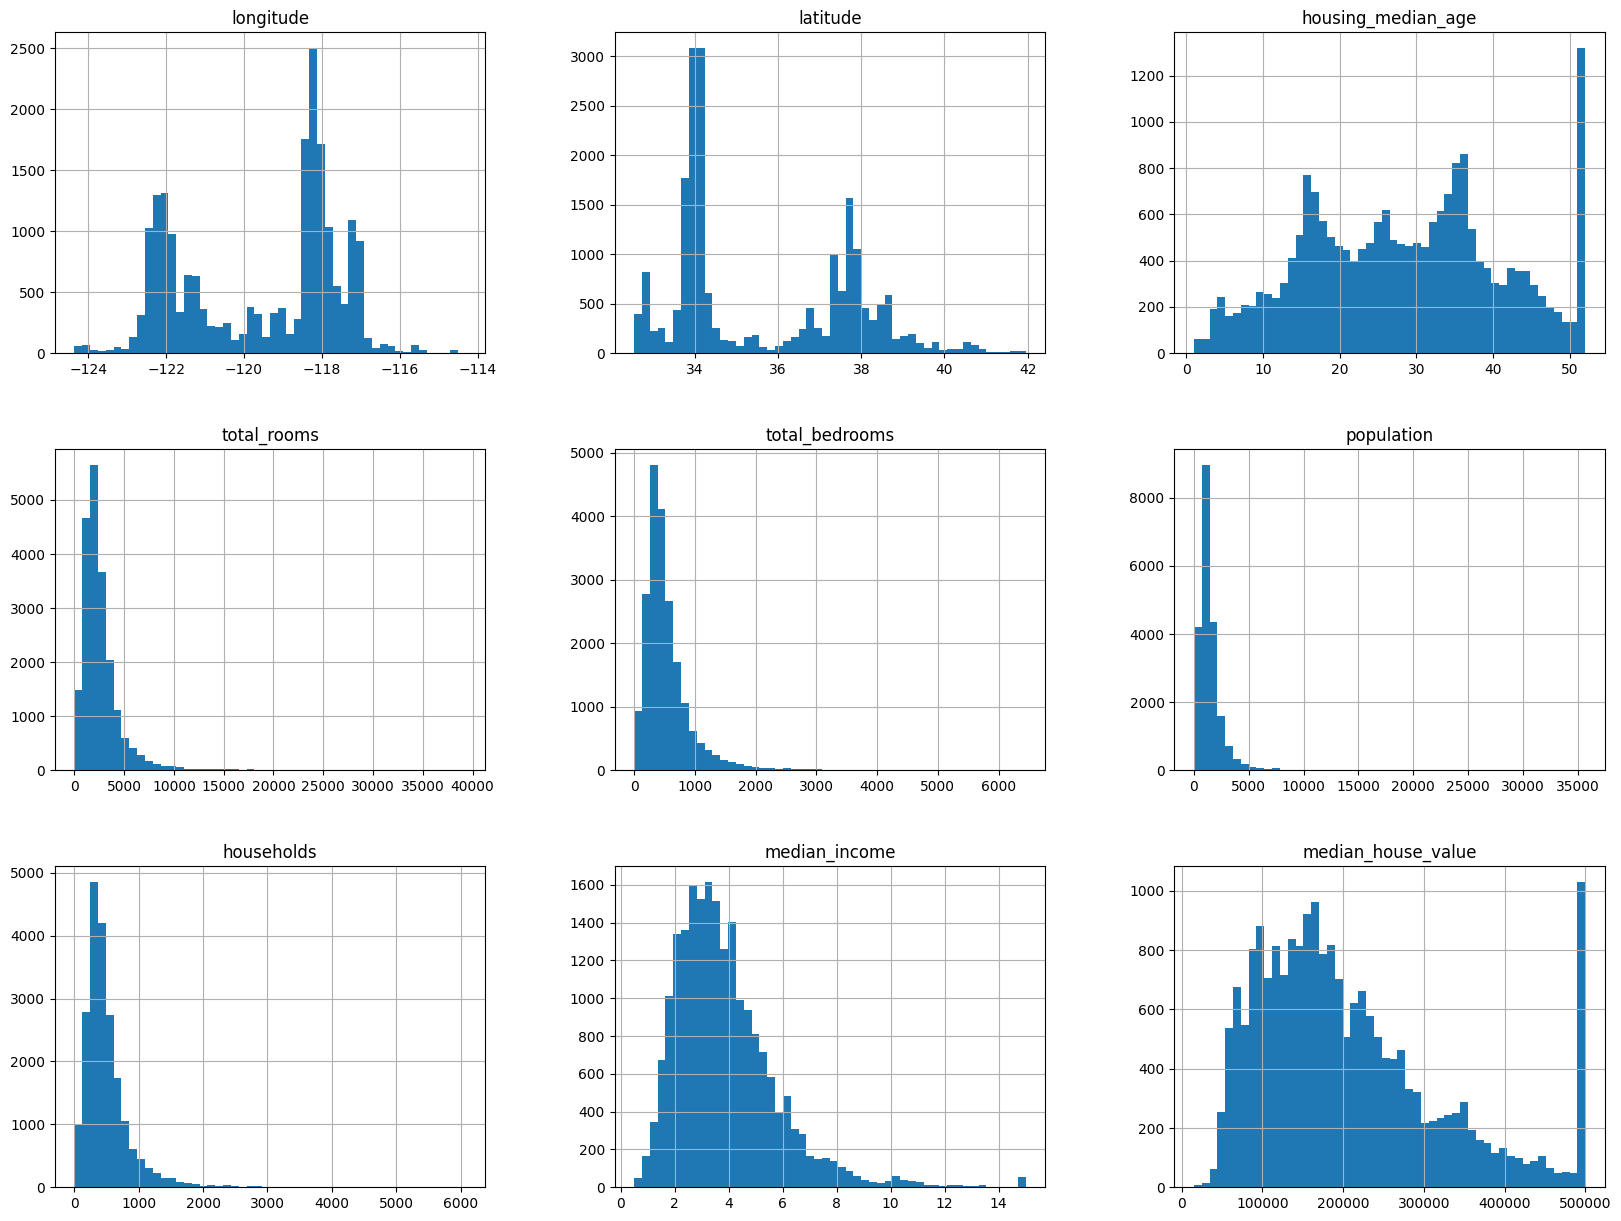

In [ ]:
# Visualiza a distribuição das variáveis numéricas com histogramas
import matplotlib.pyplot as plt

housing.hist(bins=50,figsize=(20,15))
plt.show()


## 3. Preparação para o Treinamento

In [ ]:
# Separa os dados em conjunto de treino e teste de forma aleatória
import numpy as np

def split_train_test(data, test_ration):
    shuffled_indices = np.random.permutation(len(data))           # embaralha os índices
    test_set_size = int(len(data) * test_ration)                  # define o tamanho do conjunto de teste
    test_indices = shuffled_indices[:test_set_size]               # seleciona os índices de teste
    train_indices = shuffled_indices[test_set_size:]              # seleciona os índices de treino
    return data.iloc[train_indices], data.iloc[test_indices]      # retorna os dois subconjuntos


train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set)),
print(len(test_set))

16512
4128


In [ ]:
# Divide o conjunto de dados de forma estável com base em identificadores, garantindo consistência entre execuções
from zlib import crc32

def test_set_check(identifier,test_ration): # Verifica se o hash do identificador está dentro da proporção desejada para o conjunto de teste
    return crc32(np.int64(identifier)) & 0xffffffff < test_ration * 2**32

def split_train_test_by(data,test_ration, id_column):  # Aplica a função de verificação para cada identificador
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_,test_ration))
    return data.loc[~in_test_set], data.loc[in_test_set] # Retorna os subconjuntos de treino e teste com base nos identificadores



In [ ]:
housing_with_id = housing.reset_index() # Adiciona uma coluna de índice como identificador único para garantir uma divisão reprodutível
train_set, test_set =  split_train_test_by(housing_with_id, 0.2, "index") # Aplica a divisão estável com base no índice como identificador

In [ ]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"] # Gera um identificador único e consistente por localização geográfica (latitude + longitude)
train_set, test_set = split_train_test_by(housing_with_id, 0.2, "id") # Redivide os dados usando o novo ID baseado na posição geográfica



In [ ]:
# Cria uma variável categórica baseada na renda mediana para estratificação posterior
housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5]
)


<Axes: >

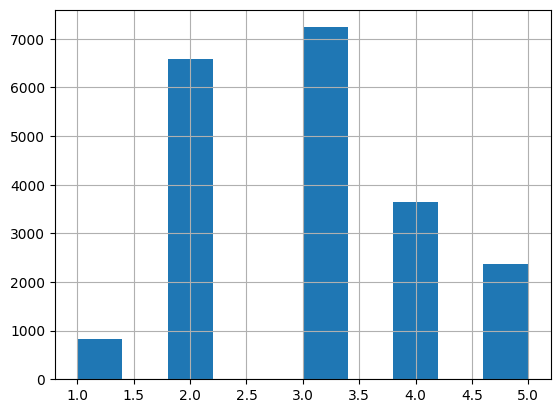

In [ ]:
housing["income_cat"].hist() # plot categorias

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# Aplica amostragem estratificada com base na variável categórica de renda
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

# Verifica a proporção das categorias de renda no conjunto de teste
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [ ]:
for set_ in (strat_train_set, strat_test_set):  # Remove a coluna 'income_cat' após o uso na estratificação (não é mais necessária)
    set_.drop("income_cat", axis=1, inplace=True)

In [ ]:
housing = strat_train_set.copy() # fazer uma copia para trabalhar

### visualização gráficas


<Axes: xlabel='longitude', ylabel='latitude'>

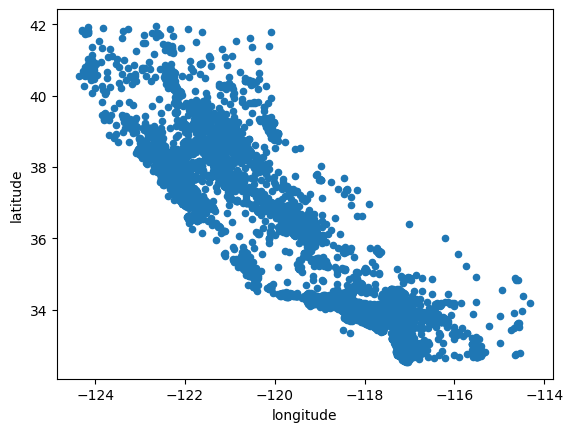

In [18]:
# gráfico de dispensão para informações geográficas
housing.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

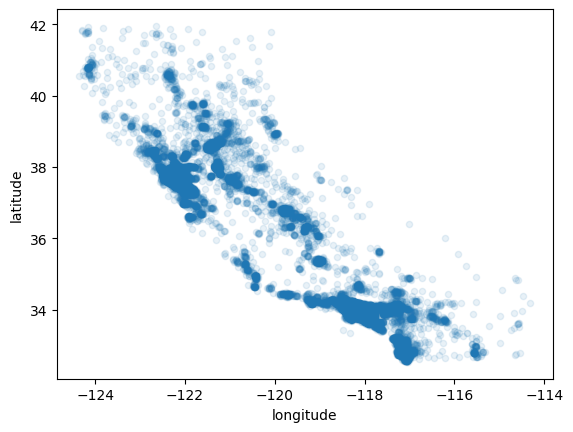

In [19]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1) # ajuda a identificar onde tem alta densidades de dados

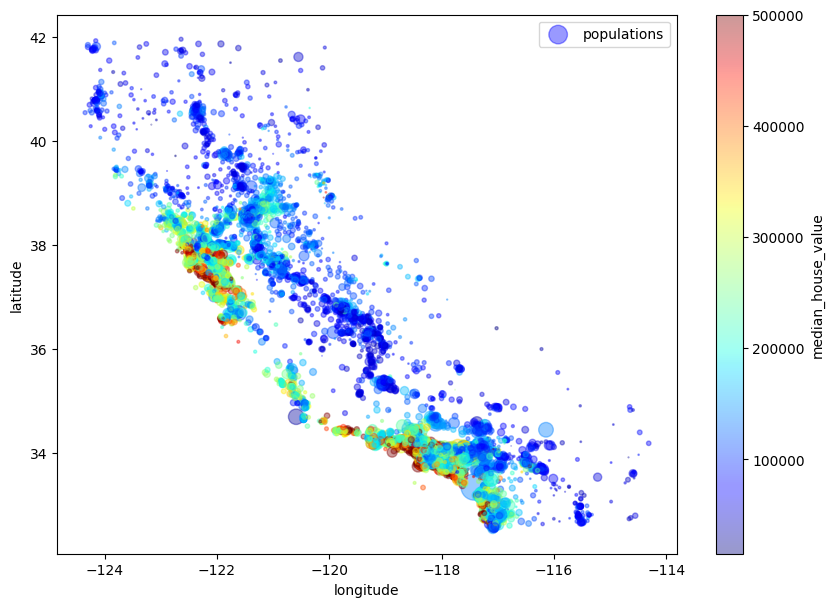

In [ ]:
# gráfico com sinalização das casas, mostrando a população e cor mais forte a medidad que fica mais caro
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100, label="populations", figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,)
plt.legend()

In [25]:
print(housing.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


In [ ]:
# correlação das var com o mediun house values -1 a 1
corr_matrix = housing.select_dtypes(include=[np.number]).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

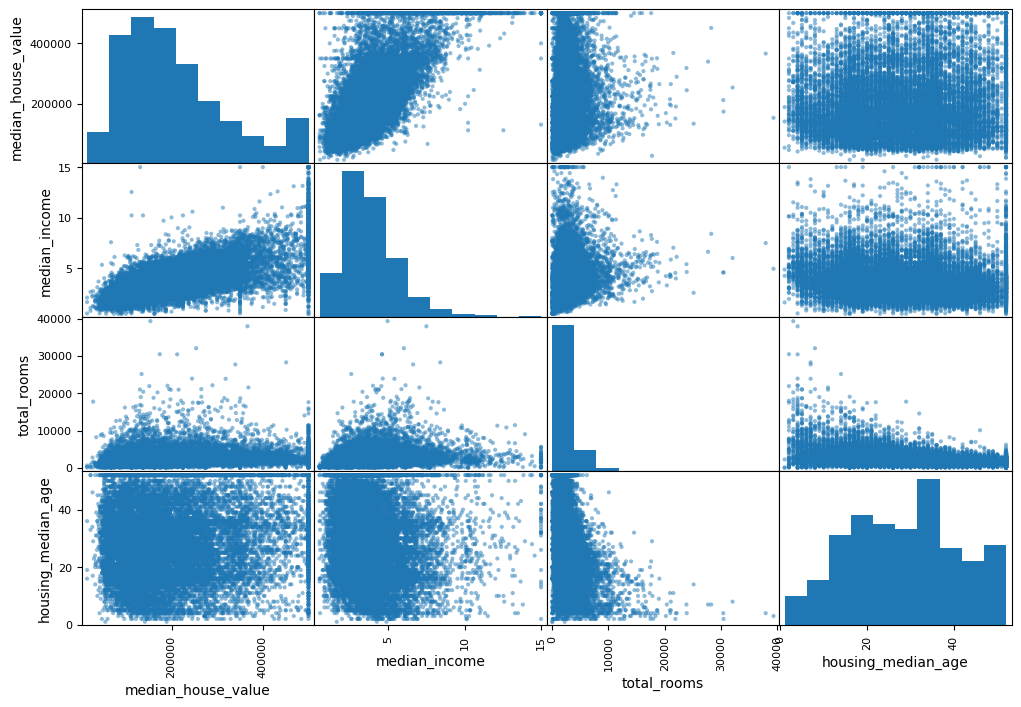

In [ ]:
# dispersão para visualizar correlações entre os principais atributos
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

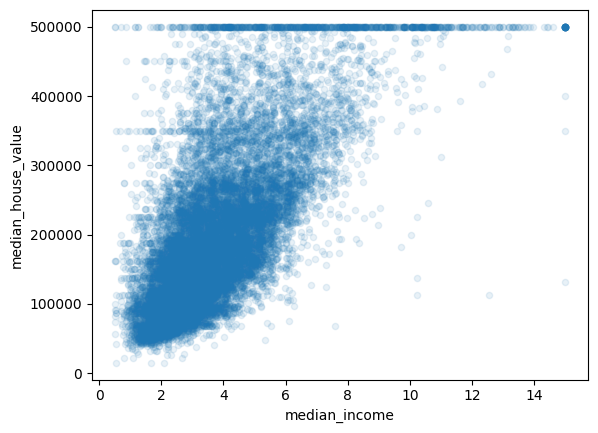

In [ ]:
# Dispersão entre renda mediana e valor médio dos imóveis para visualizar correlação e padrões
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [ ]:
# esperiemntar criação de variáveis combinadas que podem ter maior poder preditivo

housing["rooms_per_household"] = housing["total_rooms"]/ housing["households"]

housing["bedroons_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/ housing["households"]

In [ ]:
# Matriz de correlação entre atributos numéricos, ordenada pela relação com o valor médio dos imóveis
corr_matrix = housing.select_dtypes(include=[np.number]).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedroons_per_room          -0.259952
Name: median_house_value, dtype: float64

## Tratar dados


In [ ]:
# Separa os atributos de entrada (X) e o alvo (y) para o conjunto de treino
housing = strat_train_set.drop("median_house_value", axis=1)
housing__labels = strat_train_set["median_house_value"].copy()


In [ ]:
# Remove linhas com valores ausentes na coluna 'total_bedrooms'
housing.dropna(subset=["total_bedrooms"]) #remove linhas com valores nan

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN


In [ ]:
# Instancia um imputador para preencher valores ausentes com a mediana de cada atributo
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [ ]:
# copia dos dados sem as var numericas "ocean_proximity"
housing_nunm = housing.drop("ocean_proximity", axis=1)

In [ ]:
imputer.fit(housing_nunm) # calcula a media dos atributos 

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_ # aplica a media em todos atributos

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [ ]:
housing_nunm.median().values # Obtém os valores das medianas dos atributos numéricos

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [ ]:
x = imputer.transform(housing_nunm) # Aplica a imputação, substituindo valores ausentes pelas medianas calculadas

In [ ]:
housing_cat = housing[["ocean_proximity"]] # analisar as primeiras 10 linhas
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [ ]:
# Codifica atributos categóricos com valores inteiros (ordinais)
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
# Codifica atributos categóricos usando one-hot encoding (vetores esparsos binários)
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [ ]:
# Converte a matriz esparsa resultante do one-hot encoding para um array denso (numpy array)
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [46]:
# obter a lista das categorias
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# Índices das colunas relevantes (assumindo ordem fixa no array de entrada)
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

# Transformer customizado para adicionar atributos derivados ao dataset
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self  # sem necessidade de ajuste

    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, bedrooms_ix] / X[:, rooms_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, households_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

# Aplica o transformer ao conjunto de dados (como array NumPy)
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribts = attr_adder.transform(housing.values)


In [ ]:
# Pipeline de transformação para dados numéricos: imputação, engenharia de atributos e normalização
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('inputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_nunm)


In [ ]:
# Pipeline completo para transformar atributos numéricos e categóricos de forma integrada
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_nunm)
cat_atrribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),           # pipeline numérico: imputação, engenharia e escala
    ("cat", OneHotEncoder(), cat_atrribs)         # codificação one-hot para atributo categórico
])

housing_prepared = full_pipeline.fit_transform(housing)


## Treinamento


In [ ]:
# Treinamento do modelo de regressão linear com os dados preparados
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing__labels)

LinearRegression()

In [ ]:
# Geração de previsões para uma amostra e comparação com os valores reais
some_data = housing.iloc[:5]
some_labels = housing__labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("predictions:", lin_reg.predict(some_data_prepared))
print("labels:", list(some_labels))


predictions: [ 85158.9637483  305728.73923753 151978.57436459 186494.34688529
 243135.20207465]
labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [ ]:
# Avaliação do modelo via RMSE (Root Mean Squared Error) no conjunto de treino
from sklearn.metrics import mean_squared_error

housing_predict = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing__labels, housing_predict)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


68234.36684615504